

### La strategia con cui è determinato il sentiment

Posto 

- $\pi^\tau$ prezzo dell'indice al tempo $\tau$; 

- $\Theta^\tau=\Sigma^\tau (1-\Sigma^\tau)$ riparametrizzazione della previsione di crescita del mercato (vedere motivazioni teoriche); 

- $S_\tau$ valore del sentiment usato nella simulazione (in accordo con report di maggio)

Si procede come segue:

1) Valore del sentiment $E^\tau$ come media dei sentiment al giorno $\tau$ ricavata dai testi dei tweet analizzati con FinBERT

2) $\frac{\pi^t}{\pi^{t-1}} \sim f \{E^\tau\}_{\tau \in [0,t]} = k^q E^t + b^b $. Ovverosia la funzione di corrispondenza tra sentiment osservati e variazioni dei prezzi, è solo una trasformazione lineare del valore di sentiment misurato in quel giorno. I parametri di questa trasformazione lineare sono ricavati da un fit lineare su ogni quarto di anno $q=q(t)$

3) $\Theta^t= \Theta^{t-1} [k^{q(t)} E^t+b^{q(t)} + 1]$ costruzione della sequenza con $\Theta^0=1$

4) $\Theta^t_{norm}=M\Theta^t+h$ con $M,h \quad tc \quad \Theta^0_{norm}=\Theta_0=1\quad and\quad \frac{\Theta^F_{norm}}{\Theta^0_{norm} }= \frac{\pi^F}{\pi_0}$ Normalizzazione lineare della sequenza sulla base del primo e ultimo prezzo (tempo finale della simulazione $F$ e iniziale $0$).

5) $S^t= 2 (\frac{\Theta^t_{norm}}{1+\Theta^t_{norm}})-1$ costruzione della sequenza di sentiment finalmente usata nella simulazione. Questa equazione è ricavata invertendo la definizione  $\Theta^\tau = \Sigma^\tau (1-\Sigma^\tau)^{-1}$ e ricordando (da report di maggio) che $S^\tau=2\Sigma^\tau-1$

### Motivazioni teoriche

Dalle specifiche del modello (dettagli nel report di maggio) si ha che ogni agente tende in base alla sua previsione $P^t$ di crescita del prezzo dell'azione nel futuro, ad un equilibrio $\Sigma^*=P^*$ di ricchezza distribuita nello stock (in questo caso futures dell'S&P500) e ricchezza in forma di denaro. Per un sistema di agenti con la stessa previsione $P^t$ si ha che il prezzo tenderà quindi a sua volta ad una quantità $\pi^*$ in cui gli agenti sono mediamente all'equilibrio. Per condizioni ad un tempo iniziale $i$ $\pi^i, \Sigma^i$ e finale $f$ $\pi^f, \Sigma^f$ si può quindi determinare la relazione

$\frac{\pi^t}{\pi^i}= \frac{\Sigma^t (1-\Sigma^t)^{-1}}{\Sigma^i(1-\Sigma^i)^{-1}}$

**(dimostrazione di questo nel report di maggio)**

Definendo la quantità $\Theta^\tau = \Sigma^\tau (1-\Sigma^\tau)^{-1}$ si ha quindi

$\frac{\pi^t}{\pi^i}= \frac{\Theta^t}{\Theta^i}$

E da questa si può ricavare un "andamento ideale dell'indice di sentiment" sulla base dei prezzi osservati, applicando iterativamente

$\Theta^t_{true}= \Theta^{t-1}_{true} \frac{\pi^t}{\pi^{t-1}}$

Per ricavare una stima di $\Theta^t$ dai dati di sentiment di Twitter, si può stabilire che deve esistere una qualche relazione tra la sequenza di sentiment misurato su twitter e le conseguenti variazioni relative dei prezzi. Quindi, posto $E^\tau$ il sentiment misurato su twitter nel giorno $\tau$ si ha

$\frac{\pi^t-\pi^{t-1}}{\pi^{t-1}} = f( \{E^\tau\}_{\tau \in [0,t]} )$ 

***Questa $f$ può essere stabilita con diverse strategie e definisce il rapporto tra sentiment misurato e variazioni dei prezzi. Per stabilire un rapporto tra sentiment misurato $E$ e sentiment nel modello (indirettamente definito da $\Theta$) dalle equazioni precedenti si ottiene che stabilita una funzione $f$ si ha ***

$\Theta^t= \Theta^{t-1} [f( \{E^\tau\}_{\tau \in [0,t]} ) + 1]$

**L'accordo tra $\Theta$ e $\Theta_{true}$, dunque tra prezzi simulati e prezzi osservati, a meno di altri fattori è determinato unicamente da quanto la funzione $f$ può prevedere le variazioni relative dei prezzi**

### Note sul metodo

- I dati dei tweet sono tutti i tweet avvenuti in un certo giorno contenente il cashtag \$SPY e che non fossero retweet. Nessuna strategia di pulizia dei dati è ad ora stata attuata 
- La funzione $f$ di corrispondenza tra sentiment misurato e variazioni dei prezzi può essere definita in maniera da render possibile fare previsioni. Qui peraltro è definita da fit applicati quarto per quarto di anno (quindi LOCALE) mentre una soluzione più articolata (LSTM?) potrebbe dare risultati migliori con una funzione indipendente dal quarto (quindi GLOBALE)
- La normalizzazione serve a correggere i bias dati dalla non ideale funzione $f$. Sostanzialmente "impone" il punto di arrivo della simulazione nel punto in cui per il modello ci si aspetta che effettivamente la simulazione sia. La normalizzazione non sarebbe necessaria per una migliore funzione $f$
- Questa simulazione è realizzata con agenti che agiscono in base al sentiment calcolato solo secondo la strategia qui descritta, agenti che agiscono in base al trend ed alla differenza con la media mobile. Ogni agente condivide la stessa baseline di sentiment di partenza a cui si aggiungono gli effetti di altre strategie. Questo sentiment quindi è interpretabile come "misura molto aggregata di fiducia che ogni agente ha nel mercato", dell'adozione dello stock e di qualsiasi effetto sia espresso come contenuto emotivo dei tweet analizzati
- il fit locale sui quarti produce artefatti indesiderati nei periodi di alta volatilità. In particolare questo avviene in periodi di crash (2018,2020) in cui i parametri del fit sono più alti e la strategia qui seguita sovrastima le variazioni di prezzi/sentiment. Questo problema potrebbe essere risolto usando una strategia più sofisticata per stabilire $f$
- Idealmente sarebbe utile determinare una $f$ GLOBALE per la corrispondenza tweets' sentiment-variazioni dei prezzi. In questo modo la stessa funzione potrebbe essere utilizzata, una volta ricavata, per task di previsione.

### Note sui risultati

*** Questa simulazione è da assumere come proof of concept del funzionamento dei dati di Twitter come proxy per un indice del sentiment da utilizzare nella simulazione***

- La simulazione riproduce qualitativamente decentemente diversi cicli e fasi di mercato, sebbene con tempi di reazione più lenti e prezzi simulati non sempre in accordo con i prezzi osservati 
- Il limite principale della strategia utilizzata finora è la performance quantitativamente scarsa dell'indice di sentiment nei periodi di crash. Sia perché la funzione $f$ sovrastima la volatilità in quel quarto, che perché i tweets dopo i crash continuano ad avere sentiment negativo mentre la reazione di "ritorno alla media" del mercato è ben più rapida. 
- - la sovrastima della volatilità può essere risolta da una più performante funzione $f$ o tuttalpiù una diversa divisione delle regioni del fit locale
- - il rapido ritorno alla media dopo un crash potrebbe essere risolto con un'opportuna implementazione della strategia "sentiment_bymavdiff" degli agenti
- Gli effetti di altre strategia possono essere osservati guardando la previsione media delle diverse partizioni di agenti. In questa simulazione gli unici effetti sono "amplificazione della volatilità" nei periodi con variazioni più brusche, ma una simulazione più elaborata potrebbe dare insights sul ruolo delle diverse strategie in diverse fasi di mercato


In [1]:
import library.beam as bm

import pandas as pd
import numpy as np

import mplfinance as fin
import yfinance as yf

from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
from copy import deepcopy

import matplotlib.pyplot as plt

In [2]:
bm.change_default_parameter('decision', 'def_d_max', 0.4)
bm.change_default_parameter('decision', 'def_d_min', 0.0)

# bm.default_parameter['decision']['def_d_max']=0.9
bm.default_parameter

{'preliminar': {},
 'sentiment': {'sentiment_fluct': 0.0},
 'prediction': {},
 'decision': {'def_d_max': 0.4,
  'def_d_min': 0.0,
  'def_b_min': 0.0,
  'sw_mode': 'beta',
  'eta_coeff': 55,
  'sw_coeff': 'eq_dist',
  'sw_coeff_minmax': 0.02,
  'sw_coeff_postmap': <function library.beam.<lambda>(x, **d_kw)>,
  'price_fluct': 0.001,
  'reference_price': 'last',
  'subaction_par': 0.0},
 'action': {}}

In [3]:
DATA_FOLDER="Beam_data/"

In [4]:
# NB SUBSET OF TIME SIMULATION NOT IMPLEMENTED
# these two variables will be redefined from data in ps_sequence file
START=[2012, 10]
END  =[2022, 9] #<--- included

Y_START=START
Y_END  =END
if Y_END[1]==12:
    Y_END[0]+=1
    Y_END[1]=0

START_DATE=datetime(START[0], START[1], 1).date()
END_DATE  =(datetime(END[0],   END[1]+1,   1)-timedelta(days=1)).date()
    
print("simulation starting in", START_DATE, "; ending in", END_DATE)

simulation starting in 2012-10-01 ; ending in 2022-09-30


In [5]:
SP_DF=pd.read_csv(DATA_FOLDER+"ps_sequence", index_col=0)
SP_DF['date']=SP_DF['date'].map(lambda x: date.fromisoformat(x))
SP_DF

# NB SUBSET OF TIME SIMULATION NOT IMPLEMENTED
START_DATE=SP_DF.iloc[0].date
END_DATE=SP_DF.iloc[-1].date


In [6]:
prices_df=yf.download("SPY", 
                      start=START_DATE.strftime('%Y-%m-%d'), end=(END_DATE+timedelta(days=1)).strftime('%Y-%m-%d'))
# TRUE_PRICES=prices_df['Close'].values
START_PRICE=prices_df['Open'].values[0]
print("\n start price will be:", START_PRICE)
prices_df

[*********************100%***********************]  1 of 1 completed

 start price will be: 144.52000427246094


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-01,144.520004,145.690002,144.009995,144.350006,119.590279,135911200
2012-10-02,144.919998,145.149994,143.830002,144.500000,119.714516,113422200
2012-10-03,144.889999,145.429993,144.130005,145.089996,120.203339,121283100
2012-10-04,145.639999,146.339996,145.440002,146.130005,121.064941,124311600
2012-10-05,146.910004,147.160004,145.699997,146.139999,121.073227,124842100
...,...,...,...,...,...,...
2022-09-26,366.410004,370.209991,363.029999,364.309998,364.309998,92581200
2022-09-27,368.019989,370.399994,360.869995,363.380005,363.380005,108294100
2022-09-28,364.380005,372.299988,362.600006,370.529999,370.529999,110802200


In [7]:
SP_DF=SP_DF[SP_DF['date'] <= END_DATE  ]
SP_DF=SP_DF[SP_DF['date'] >= START_DATE]
SP_DF=SP_DF.reset_index().drop(columns='index')
SP_DF

,date,market_state,close_price,volume,sentiment_mean,sentiment_std,N_tweets,sentiment
0,2012-10-01,O,144.350006,135911200.0,-0.057639,0.413685,580,-0.000479
1,2012-10-02,O,144.500000,113422200.0,-0.039591,0.411674,554,-0.000531
2,2012-10-03,O,145.089996,121283100.0,-0.029051,0.392069,542,-0.000334
3,2012-10-04,O,146.130005,124311600.0,0.003515,0.413415,529,0.000631
4,2012-10-05,O,146.139999,124842100.0,-0.082735,0.449160,577,-0.000445
...,...,...,...,...,...,...,...,...
3647,2022-09-26,O,364.309998,92581200.0,-0.036661,0.299574,9889,0.428411
3648,2022-09-27,O,363.380005,108294100.0,-0.046693,0.315527,10499,0.426553
3649,2022-09-28,O,370.529999,110802200.0,-0.026500,0.301999,10896,0.426964
3650,2022-09-29,O,362.790009,112952300.0,-0.042154,0.308812,10649,0.425618


In [8]:
MARKET_STOP={}
for index, data in SP_DF.iterrows():
    if data.market_state=='C':
        MARKET_STOP[index]=data.date #<--- keys will be the int number of day simulation; values will be actual dates  

## Comparing extracted sentiment agains "perfect" sentiment

In [9]:
def theta_to_sigma(theta):
    return theta/(1+theta)

def sigma_to_sent(sigma):
    return 2*sigma-1

In [10]:
prices=[START_PRICE]
for p in SP_DF['close_price']:
    prices.append(p)

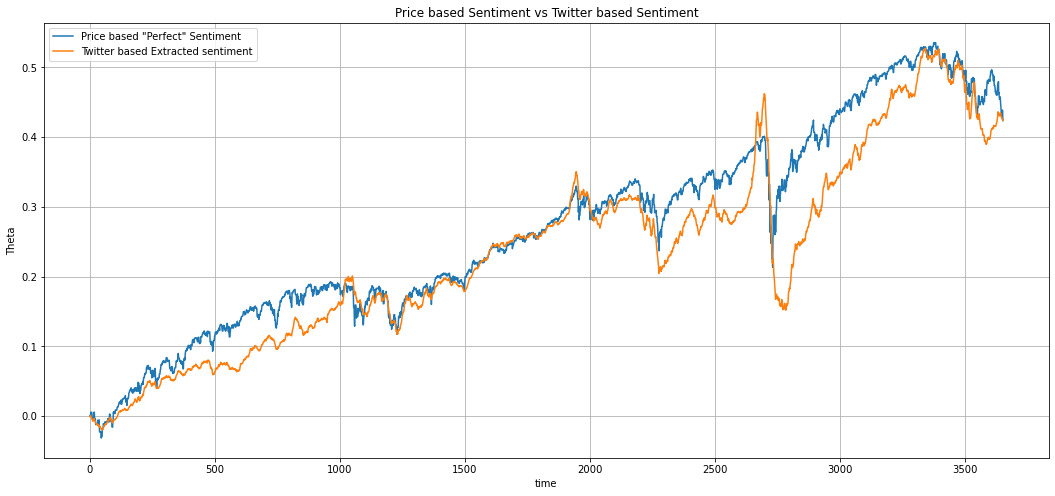

In [11]:
P_Theta_0=1
P_Theta=[]
for t, p in enumerate(prices): 
    if t==0:
        P_Theta.append(P_Theta_0)
        continue
#     print(t, p, prices[t-1], P_Theta[t-1], '--->',  p/prices[t-1]*P_Theta[t-1])
    P_Theta.append(  p/prices[t-1]*P_Theta[t-1] )  
P_Theta=np.array(P_Theta)

P_Sent =sigma_to_sent( theta_to_sigma(P_Theta) )

plt.figure(figsize=(18,8))
plt.title("Price based Sentiment vs Twitter based Sentiment")
plt.plot(P_Sent, label="Price based \"Perfect\" Sentiment")
plt.plot(SP_DF['sentiment'], label="Twitter based Extracted sentiment")
# plt.plot(L_Normalized_Theta, label="Locally Normalized Theta")
plt.ylabel("Theta")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.show()

## Simulation rules

In [12]:
BASELINE_SENTIMENT=SP_DF['sentiment']

In [13]:
mkt=bm.Market(start_price=START_PRICE, start_date=START_DATE)

mkt.add_partition(1000, 'gen_agents')
mkt.set_part_sentiment('gen_agents', bm.sentiment_exogen(BASELINE_SENTIMENT))

mkt.add_partition(1000, 'trend_agents')
mkt.set_part_sentiment('trend_agents', bm.sentiment_exogen(BASELINE_SENTIMENT))
mkt.add_part_sentiment_bytrend('trend_agents', 'MB', math_operation='add')
mkt.add_part_sentiment('trend_agents', bm.sentiment_clip())

mkt.add_partition(1000, 'mav_agents')
mkt.set_part_sentiment('mav_agents', bm.sentiment_exogen(BASELINE_SENTIMENT))
mkt.add_part_sentiment_bymavdiff('mav_agents', 'MB', math_operation='add')
mkt.add_part_sentiment('mav_agents', bm.sentiment_clip())

mkt.add_part_fn('gen_agents', 'decision', bm.decision_stop_days(MARKET_STOP))
mkt.add_part_fn('trend_agents', 'decision', bm.decision_stop_days(MARKET_STOP))
mkt.add_part_fn('mav_agents', 'decision', bm.decision_stop_days(MARKET_STOP))

mkt.add_metric('sigma_scatter', bm.mtr_sct_sigma)


Building partition gen_agents :  1000 agents of kind def

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5

Building partition trend_agents :  1000 agents of kind def

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5

Building partition mav_agents :  1000 agents of kind def

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5


In [14]:
SIM_DAYS=len(SP_DF)

### Summary of agents' operations

In [15]:
mkt.all_op_summary()


######################## GEN_AGENTS ########################

 process preliminar__________________________________________________
op. preliminar: nothing

 process sentiment___________________________________________________
op. sentiment: exogen (set)

 process prediction__________________________________________________
op. prediction: linear

 process decision____________________________________________________
op. tr_choice: functional_binomial
op. tr_price: gaussian_multiplicative (last,0.001)
op. tr_wealth: parametric_balance (beta,eq_dist)
op. tr_normalize: cut_too_small
op. stop_days: holidays

 process action______________________________________________________
op. action_execution: call_book

####################### TREND_AGENTS #######################

 process preliminar__________________________________________________
op. preliminar: nothing

 process sentiment___________________________________________________
op. sentiment: exogen (set)
op. sentiment: take_from_shar

## One sample run

In [16]:
os_mkt=deepcopy(mkt)

In [17]:
os_mkt.run(SIM_DAYS)

  0%|          | 0/3652 [00:00<?, ?it/s]

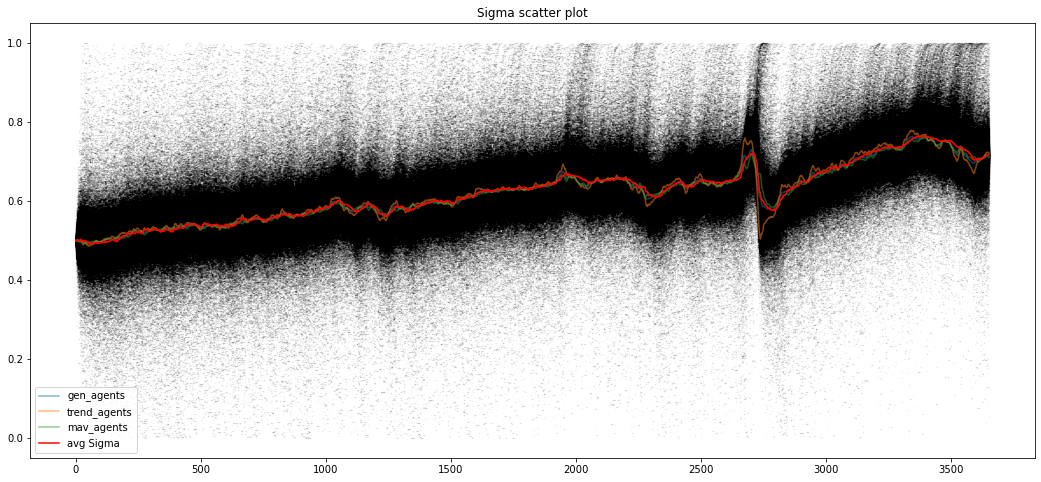

In [18]:
# mkt.show_infograph()

plt.figure(figsize=(18,8))
os_mkt.plot_partition_metric('avg_pred')
bm.plot_sigma_scatter(os_mkt, show_avg=True)

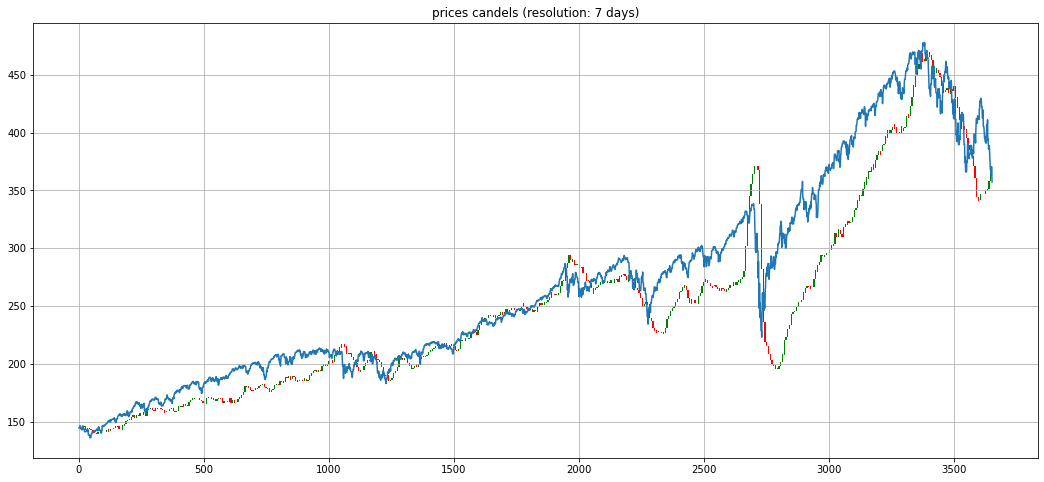

In [19]:
plt.figure(figsize=(18,8))
plt.plot(SP_DF['close_price'])
os_mkt.plot_price(resolution=7)

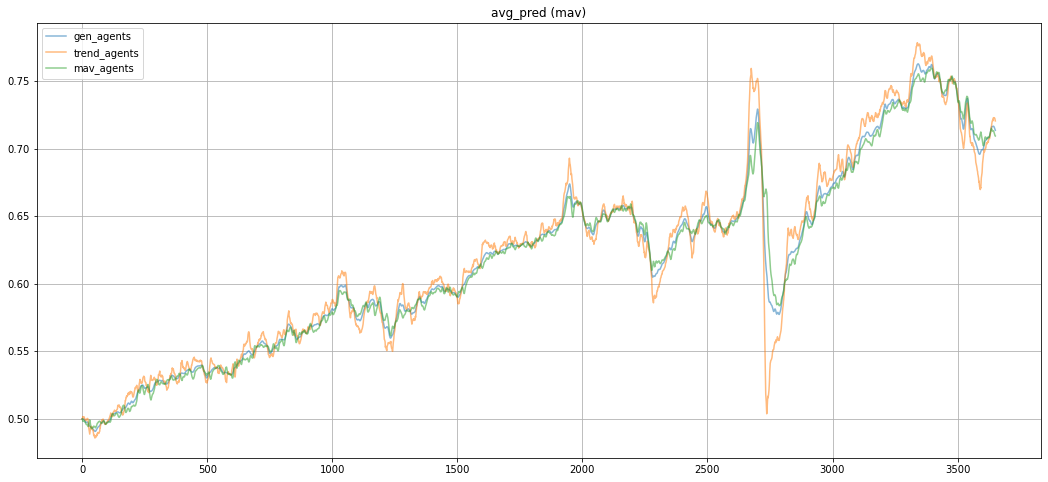

In [20]:
plt.figure(figsize=(18,8))
os_mkt.plot_partition_metric('avg_pred')

## Multiple runs

In [21]:
lab=bm.Lab(mkt)
lab.add_metric('daily_price', subname='close')

added required result avg_price
added required result daily_price


In [22]:
lab.multi_run(SIM_DAYS, 10)

--------------------------------------------------  run 1 of 10


  0%|          | 0/3652 [00:00<?, ?it/s]

--------------------------------------------------  run 2 of 10


  0%|          | 0/3652 [00:00<?, ?it/s]

--------------------------------------------------  run 3 of 10


  0%|          | 0/3652 [00:00<?, ?it/s]

--------------------------------------------------  run 4 of 10


  0%|          | 0/3652 [00:00<?, ?it/s]

--------------------------------------------------  run 5 of 10


  0%|          | 0/3652 [00:00<?, ?it/s]

--------------------------------------------------  run 6 of 10


  0%|          | 0/3652 [00:00<?, ?it/s]

--------------------------------------------------  run 7 of 10


  0%|          | 0/3652 [00:00<?, ?it/s]

--------------------------------------------------  run 8 of 10


  0%|          | 0/3652 [00:00<?, ?it/s]

--------------------------------------------------  run 9 of 10


  0%|          | 0/3652 [00:00<?, ?it/s]

--------------------------------------------------  run 10 of 10


  0%|          | 0/3652 [00:00<?, ?it/s]

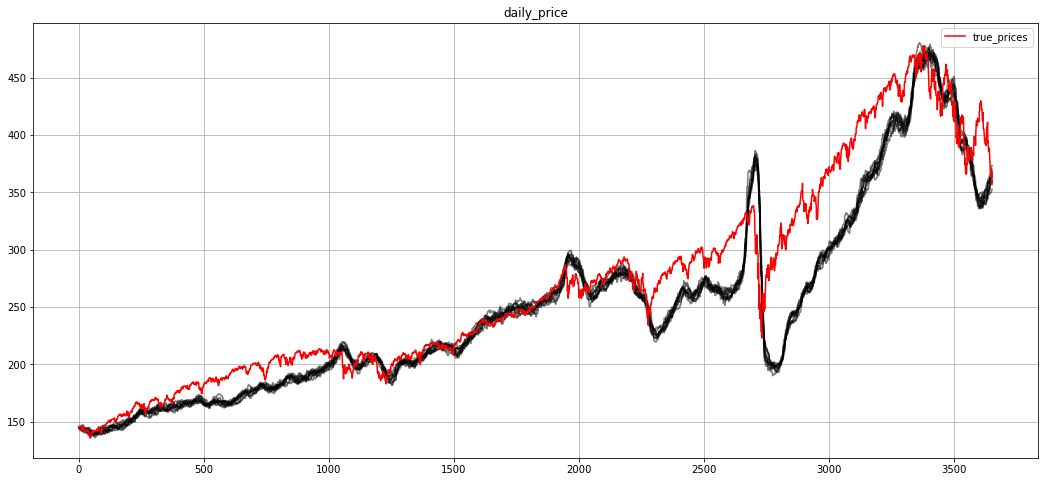

In [23]:
plt.figure(figsize=(18,8))
lab.plot_metric('daily_price')
plt.plot(SP_DF['close_price'], label='true_prices', color='r')
plt.legend()
plt.grid()

In [24]:
# plt.figure(figsize=(18,8))

# mkt.plot_price('close')
# plt.plot(SP_DF['close_price'])

In [25]:
# plt.figure(figsize=(18,8))
# plt.plot(mkt.price_history)

In [26]:
# mkt.plot_price(what='avg')

In [27]:
# mkt.display_mavdiff(end=2)

## To do

- Define how the different factors come into play in the simulation
- - Sentiment index
- - - Fitting: local linear or other?
- - - Normalization: Global or local?
- - Adoption?
- - Different agents' strategies?
- - - Fully random agents?
- Elaborate on what this simulation wants to achieve. What are the factors coming into play in this?
- - Reproduce observed prices with these factors? Analyse how and when each factor came into play?
- - Study on multiple stocks?
- Project flow on how to proceed
- - Data cleaning of twitter?
- - Grid search of best factor parametrizations?
- - Do I need more computational power?